In [1]:
# Biblioteca para baixar arquivos do Google Drive
!pip install gdown

!pip install numpy scikit-learn keras tensorflow plotly


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os, gdown

csv_file = 'card_transdata.csv'

if not os.path.exists(csv_file):
    # Baixa o arquivo do Google Drive
    gdown.download(id='1mvP2vd-c1jpzQsRdgeOVOfbAm804DEMM', output=csv_file)
else:
    print(f'Arquivo {csv_file} já se encontra nesta sessão do colab')

Arquivo card_transdata.csv já se encontra nesta sessão do colab


In [3]:
#importa bibliotecas
#pandas para manipulação de dados
#plotly para representações visuais (gráficos)
import pandas as pd
import plotly.express as px

In [4]:
#atribuindo o dataset para um dataframe pandas
dataframe = pd.read_csv(csv_file)

In [5]:
#realizando algumas análises estatísticas iniciais com o dataframe
dataframe.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
#analisando os primeiros dados do dataframe
dataframe.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [7]:
#certificando os tipos das variáveis em estudo - previsoras e meta
dataframe.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [8]:
#verificando a existência de dados nulos no dataframe
dataframe.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

**Nesse ponto, vamos começar a fazer análises mais profundas sobre os dados**

In [9]:
#verificar as correlações entre as variáveis
#Método padrão de correlação: Pearson (default no pandas)
dataframe.corr()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,0.000193,-0.001374,0.143124,-0.000697,-0.001622,-0.001301,0.187571
distance_from_last_transaction,0.000193,1.000000,0.001013,-0.000928,0.002055,-0.000899,0.000141,0.091917
ratio_to_median_purchase_price,-0.001374,0.001013,1.000000,0.001374,0.000587,0.000942,-0.000330,0.462305
repeat_retailer,0.143124,-0.000928,0.001374,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000697,0.002055,0.000587,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.001622,-0.000899,0.000942,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001301,0.000141,-0.000330,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.187571,0.091917,0.462305,-0.001357,-0.060975,-0.100293,0.191973,1.000000


In [10]:
#verificar as correlações entre as variáveis
#Método padrão de correlação: Spearman
dataframe.corr(method='spearman')

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
distance_from_home,1.000000,-0.001068,-0.000152,0.559724,-0.000118,-0.000338,-0.001812,0.095032
distance_from_last_transaction,-0.001068,1.000000,-0.000111,-0.001352,-0.000165,0.000555,-0.001076,0.034661
ratio_to_median_purchase_price,-0.000152,-0.000111,1.000000,0.001202,-0.000099,0.000251,-0.000376,0.342838
repeat_retailer,0.559724,-0.001352,0.001202,1.000000,-0.001345,-0.000417,-0.000532,-0.001357
used_chip,-0.000118,-0.000165,-0.000099,-0.001345,1.000000,-0.001393,-0.000219,-0.060975
used_pin_number,-0.000338,0.000555,0.000251,-0.000417,-0.001393,1.000000,-0.000291,-0.100293
online_order,-0.001812,-0.001076,-0.000376,-0.000532,-0.000219,-0.000291,1.000000,0.191973
fraud,0.095032,0.034661,0.342838,-0.001357,-0.060975,-0.100293,0.191973,1.000000


**Vamos limpar os dados, utilizando somente as variáveis com maior correlação em relação a fraude**

*   **Variáveis a serem utilizadas**:
    * **ratio_to_median_purchase_price** - 1º lugar em ambas as análises
    * **online_order** - 2º lugar em ambas as análises
    * **distance_from_home** - 3º lugar via "Pearson" e 4º via "Spearman"
    * **used_pin_number** - 4º lugar via "Pearson" e 3º via "Spearman"

*   **Variáveis descartadas**:
    * **used_chip** - além da correlação não ser das maiores, vimos que muitas linhas possuíam, ao mesmo tempo, a condição "TRUE" de venda online ("online_order") e uso do chip ("used_chip"), o que não faz muito sentido
    * **repeat_retailer** - correlação mais baixa de todas
    * **distance_from_last_transaction** - segunda mais baixa correlação



In [11]:
#Vamos dropar a primeira coluna - se usou chip
dataframe_sem_chip = dataframe.drop(['used_chip'], axis=1)

In [12]:
#Vamos dropar a segunda coluna - se o vendedor é o mesmo
dataframe_sem_repeat_retailer = dataframe_sem_chip.drop(['repeat_retailer'], axis=1)

In [13]:
#Vamos dropar a terceira coluna - distância para a última transação
dataframe_limpo_final = dataframe_sem_repeat_retailer.drop(['distance_from_last_transaction'], axis=1)

In [14]:
#vamos imprimir o dataframe novo limpo
dataframe_limpo_final.describe()

,distance_from_home,ratio_to_median_purchase_price,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,1.824182,0.100608,0.650552,0.087403
std,65.390784,2.799589,0.300809,0.476796,0.282425
min,0.004874,0.004399,0.000000,0.000000,0.000000
25%,3.878008,0.475673,0.000000,0.000000,0.000000
50%,9.967760,0.997717,0.000000,1.000000,0.000000
75%,25.743985,2.096370,0.000000,1.000000,0.000000
max,10632.723672,267.802942,1.000000,1.000000,1.000000


In [15]:
#vamos analisar a distribuição dos dados, de acordo com a ocorrência ou não de fraude
number_of_fraud = len(dataframe_limpo_final[dataframe['fraud'] == 1])
number_of_not_fraud = len(dataframe[dataframe_limpo_final['fraud'] == 0])
print(f'Número de transações com fraude: {number_of_fraud}')
print(f'Número de transações sem fraude: {number_of_not_fraud}')
print(f'Porcentagem de transações com fraude: {number_of_fraud / len(dataframe) * 100}%')

Número de transações com fraude: 87403
Número de transações sem fraude: 912597
Porcentagem de transações com fraude: 8.7403%


fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

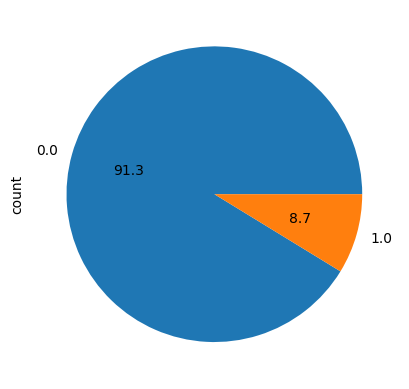

In [16]:
#representação gráfica da célula anterior
dataframe_limpo_final.value_counts("fraud").plot.pie(autopct = "%.1f")
dataframe_limpo_final.value_counts("fraud")

**Agora que já limpamos, vamos novamente imprimir as correlações que ficaram, nos dois métodos**

In [17]:
#importar biblioteca que faz o mapa de calor com as correlações, para visualizarmos melhor
import seaborn as sns

<Axes: >

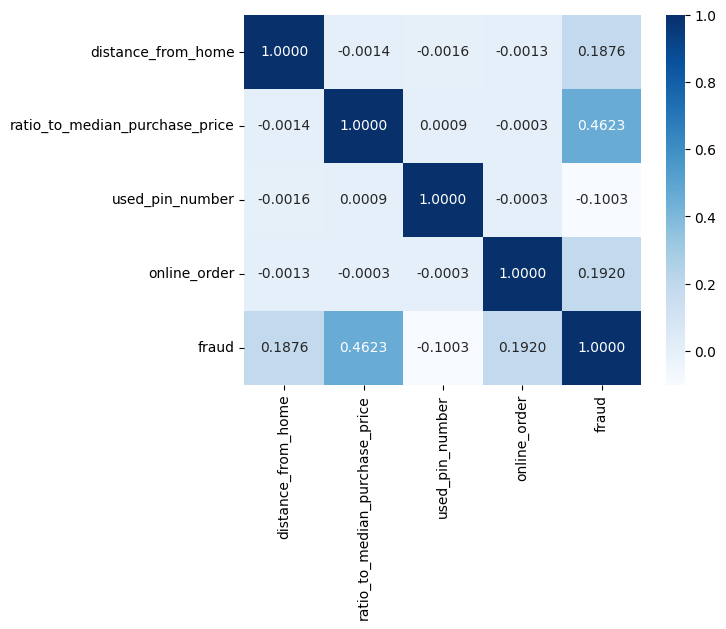

In [18]:
#obter as correlações (método Pearson) e imprimir o mapa de calor das correlações
dataframe_pearson = dataframe_limpo_final.corr("pearson")
sns.heatmap(dataframe_pearson, xticklabels = dataframe_pearson.columns, yticklabels = dataframe_pearson.columns, annot = True, fmt=".4f",cmap = "Blues")

<Axes: >

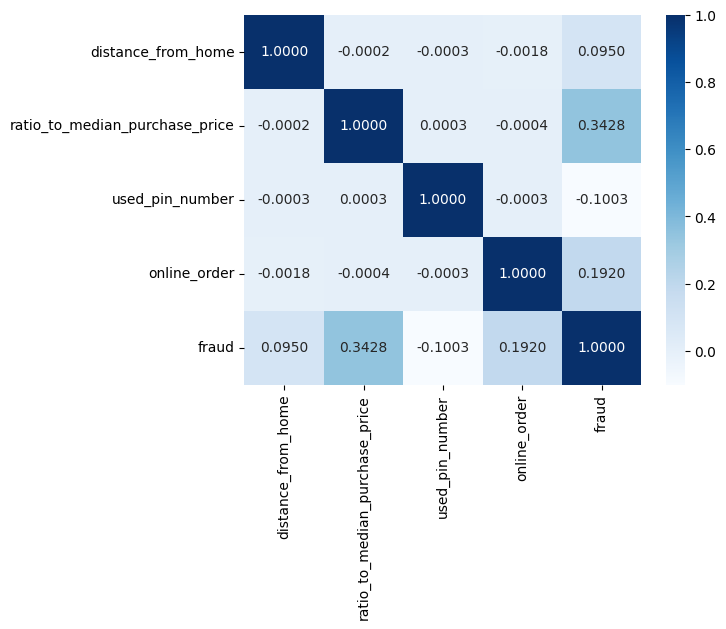

In [19]:
#obter as correlações (método Spearman) e imprimir o mapa de calor das correlações
dataframe_spearman = dataframe_limpo_final.corr("spearman")
sns.heatmap(dataframe_spearman, xticklabels = dataframe_spearman.columns, yticklabels = dataframe_spearman.columns, annot = True, fmt=".4f",cmap = "Blues")

In [20]:
#importar as bibliotecas aprendizado de máquina e de plotagem para utilizar ao final do treinamento
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import numpy as np

In [21]:
#Continuar o pré-processamento
#Os treinamentos anteriores estavam com underfit em decorrência da desproporcionalidade entre as ocorrências de fraude e não fraude
#Dessa vez, vamos balancear os dados de treinamento de forma proporcional, para que exista uma relação 1:1 entre fraude e não - visto que o treinamento com viés levemente positivo para fraude não melhorou

n_amostras = 87403
no_fraud_data = dataframe_limpo_final[dataframe_limpo_final['fraud'] == 0]
fraud_data = dataframe_limpo_final[dataframe_limpo_final['fraud'] == 1]

num_de_splits = len(no_fraud_data) // n_amostras

normalized_no_fraud_data = no_fraud_data.sample(n=n_amostras, random_state=100)
normalized_fraud_data = fraud_data.sample(n=n_amostras, random_state=100)

no_fraud_split = normalized_no_fraud_data.sample(frac=1, random_state=100).reset_index(drop=True)
splittado = np.array_split(no_fraud_split, num_de_splits)

#imprimindo as ocorrências, por ocorrência ou não de fraude, para certificar que deu certo
dataframe_limpo_final_concate = pd.concat([normalized_no_fraud_data, normalized_fraud_data], axis=0)
dataframe_limpo_final_concate.value_counts('fraud')

c:\Users\julio\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


fraud
0.0    87403
1.0    87403
Name: count, dtype: int64

In [22]:
datasets_no_fraud_treinamento = []

for i in range(4): # 4 datasets escolhidos
    df_balanced = pd.concat([fraud_data, splittado[i]], axis=0).sample(frac=1, random_state=i).reset_index(drop=True)
    datasets_no_fraud_treinamento.append(df_balanced)
    print(f"Dataset: {i+1} | Shape: {df_balanced.shape}")

Dataset: 1 | Shape: (96144, 5)
Dataset: 2 | Shape: (96144, 5)
Dataset: 3 | Shape: (96144, 5)
Dataset: 4 | Shape: (96143, 5)


In [23]:
#vamos separar as variáveis previsoras da variável de classe (meta)
#aqui vamos pegar só as previsoras
for i in range(4):
    X = datasets_no_fraud_treinamento[i].iloc[:, 0:4].values  # feats
    y = datasets_no_fraud_treinamento[i].iloc[:, 4].values    # target

    print(f"Dataset {i+1} - X shape: {X.shape}, y shape: {y.shape}")

Dataset 1 - X shape: (96144, 4), y shape: (96144,)
Dataset 2 - X shape: (96144, 4), y shape: (96144,)
Dataset 3 - X shape: (96144, 4), y shape: (96144,)
Dataset 4 - X shape: (96143, 4), y shape: (96143,)


In [24]:
#e aqui vamos pegar só a coluna meta ('fraude')
y_fraud_data = dataframe_limpo_final_concate.iloc[:,4].values
y_fraud_data

array([0., 0., 0., ..., 1., 1., 1.])

In [25]:
#precisamos separar parte do dataset para treino e parte para teste
#dentro das 18000 ocorrência que deixamos, decidimos na proporção 70% treino e 30% teste
splits = []

for i in range(4):
    X = datasets_no_fraud_treinamento[i].iloc[:, 0:4].values
    y = datasets_no_fraud_treinamento[i].iloc[:, 4].values

    x_train_fraud_data, x_test_fraud_data, y_train_fraud_data, y_test_fraud_data = train_test_split(X, y, test_size=0.3, random_state=100, shuffle=True)
    splits.append((x_train_fraud_data, x_test_fraud_data, y_train_fraud_data, y_test_fraud_data))

    print(f"Dataset {i+1}")
    print("Qtd de treino: " + str(len(x_train_fraud_data)))
    print("Qtd de teste: " + str(len(x_test_fraud_data)))

Dataset 1
Qtd de treino: 67300
Qtd de teste: 28844
Dataset 2
Qtd de treino: 67300
Qtd de teste: 28844
Dataset 3
Qtd de treino: 67300
Qtd de teste: 28844
Dataset 4
Qtd de treino: 67300
Qtd de teste: 28843


In [26]:
#precisamos ajustar e normalizar a escala dos dados
# scale = MinMaxScaler()
# x_normalized_train_fraud_data = scale.fit_transform(x_train_fraud_data)
# x_normalized_test_fraud_data = scale.fit_transform(x_test_fraud_data)

In [27]:
#imprimir o dataframe de treinamento, para verificar a normalização
x_train_fraud_data

array([[ 13.86932609,   5.17636496,   0.        ,   1.        ],
       [ 35.57364649,   5.72206808,   0.        ,   1.        ],
       [  2.19150515,   4.49548211,   0.        ,   1.        ],
       ...,
       [ 11.07552558,   5.69593107,   0.        ,   1.        ],
       [  2.31909052,  19.56565067,   0.        ,   1.        ],
       [114.21807721,   0.30329304,   0.        ,   1.        ]])

In [28]:
#imprimir o dataframe de teste do modelo, para verificar a normalização
x_test_fraud_data

array([[ 1.71300565,  6.41251914,  0.        ,  1.        ],
       [ 1.65921414,  4.93582755,  0.        ,  1.        ],
       [ 6.95385534,  6.17145531,  0.        ,  1.        ],
       ...,
       [10.99080974,  4.11527653,  0.        ,  1.        ],
       [32.5997165 , 14.57428624,  0.        ,  1.        ],
       [32.55004547, 10.26287699,  0.        ,  1.        ]])

In [29]:
#agora vamos treinar o modelo, utilizando MLP (multi-layer perceptron), um tipo de rede neural
#utilizamos:
  #topologia com 5 camadas ocultas, de 5, 10, 20, 50, 20, 10 e 5 neurônios, respectivamente
  #número máximo de 5000 iterações
  #método de ativação 'relu'
  #solver 'adam'
  #learning-rate 'constant'
  #tolerance de '5e-5'

neural_network_fraud = MLPClassifier(hidden_layer_sizes = (5, 10, 16, 16, 10, 5), max_iter = 5000, learning_rate='constant', solver='adam', activation='relu', tol=0.00005, batch_size=512)

for i in range(4):
  x_train_fraud_data, x_test_fraud_data, y_train_fraud_data, y_test_fraud_data = splits[i]
  neural_network_fraud.fit(x_train_fraud_data, y_train_fraud_data)

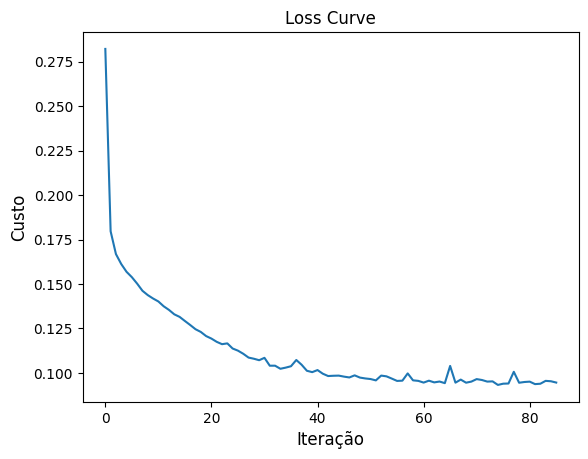

In [30]:
#vamos plotar a curva de aprendizado - por iteração (eixo x) x custo (eixo y)
plt.plot(neural_network_fraud.loss_curve_)
plt.title("Loss Curve", fontsize=12)
plt.xlabel("Iteração", fontsize=12)
plt.ylabel("Custo", fontsize=12)
plt.show()

In [31]:
#com o modelo treinado, vamos fazer uma previsão qualquer, passando dados de teste
previsoes = neural_network_fraud.predict([[3.35463e+05, 5.54139e+05, 0.00000e+00, 0.00000e+00]])
previsoes

array([1.])

In [32]:
#vamos fazer as previsões com os dados separados de teste
previsoes = neural_network_fraud.predict(x_test_fraud_data)
previsoes

array([1., 1., 1., ..., 1., 1., 1.])

In [33]:
#vamos fazer uma análise estatística sobre o modelo treinado
print(accuracy_score(y_test_fraud_data, previsoes))
print(classification_report(y_test_fraud_data, previsoes))

0.9436605068820858
              precision    recall  f1-score   support

         0.0       0.65      0.81      0.72      2595
         1.0       0.98      0.96      0.97     26248

    accuracy                           0.94     28843
   macro avg       0.82      0.89      0.85     28843
weighted avg       0.95      0.94      0.95     28843



In [34]:
#vamos calcular a matriz de confusão com as métricas do modelo
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test_fraud_data, previsoes , normalize='pred')
print(cf_matrix)

[[0.64904733 0.0188753 ]
 [0.35095267 0.9811247 ]]


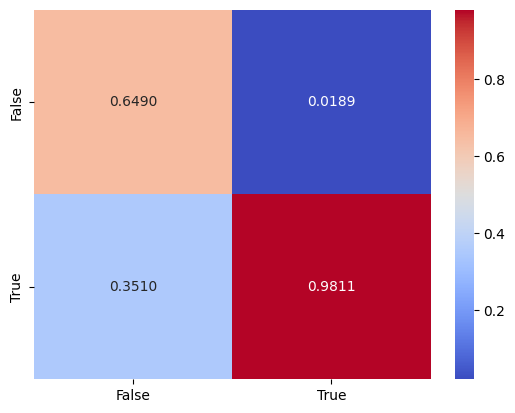

In [35]:
#vamos plotar (desenhar) a matriz de confusão
false_true = ['False', 'True']
sns.heatmap(cf_matrix, annot=True, fmt='.4f', cmap='coolwarm', xticklabels=false_true, yticklabels=false_true)
plt.show()